## Telecom Churn Classifier
Churn rate is the loss of clients or customers. customer churn is particularly important in the telecommunications industry where revenues are heavily dependent on subscriptions. 

Here, churned customers were predicted using the datasets containing customer informations. The SMOTE (Synthetic Minority Oversampling Technique) technique was adopted to deal with unbalanced dataset before applying different classifiers. Both SelectKBest and principal component analysis (PCA) methods are used for reducing the number of features in dataset. By feature selection, the irrelevant features are selected and simply excluded without changing them. The remained features contribute most to the target variable. In other words, it uses statistical tests to select features with the highest correlation to the target. By PCA, the number of features (dimensions) is reduced by transforming to lower dimention but retaining most of information without taking the target into consideration. 

The link for the dataset is here: 
https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics
data contains 7043 observations and 21 columns. There are no missing values.

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [334]:
#import data
data = pd.read_excel('C:/Users/hamed/Desktop/ThinkfulDS/Assignments/Ph2Module16_Capstone2/datasets_42343_72434_WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [335]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [336]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.0,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531.0,2
top,5804-JMYIO,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11.0,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [338]:
# column names are converted to lower case for ease of use.
data.columns = data.columns.str.lower()

In [339]:
# determine actual categorical features 
# totalcharges is object variable but it has 6531 unique values.
data.nunique()

customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64

In [340]:
#dataset is cleaned and there is no null value.
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [341]:
#There are 7043 rows and 21 columns.
len(data)

7043

In [342]:
len(data.columns)

21

In [343]:
#Here is the column names.
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [344]:
#data['totalcharges2'] = pd.to_numeric(data['totalcharges'].str.lstrip())

In [345]:
#type(data['totalcharges'][1])

In [346]:
#totalcharges column is not numeric. so it should be converted to numeric variable. 
data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce')

In [347]:
#As we forced conversion to numeric data, missing values could not be converted and appeared as null value.
data['totalcharges'].isnull().sum()

11

In [348]:
#the rows with generated null values are dropped from the dataset. 
data.dropna(inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE8F8FA388>,
      dtype=object)

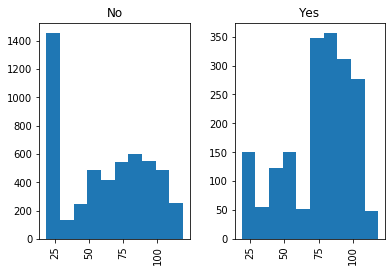

In [349]:
#Most of the customers who pay as low as 25$ stayed with the company.
#most of the churned customers pas higher than 75$
data['monthlycharges'].hist(by=data['churn'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE90EBD788>,
      dtype=object)

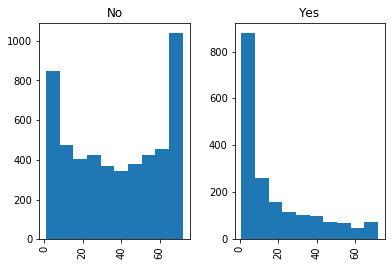

In [350]:
# most of the churned customers where within their first 5 months of contract
data['tenure'].hist(by=data['churn'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE9127B908>,
      dtype=object)

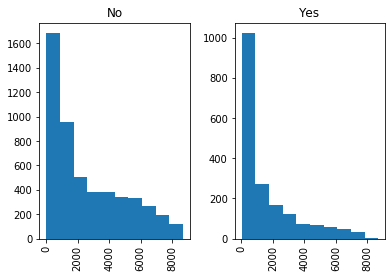

In [351]:
data['totalcharges'].hist(by=data['churn'])

In [353]:
numerical_columns_list = ['tenure', 'monthlycharges', 'totalcharges']

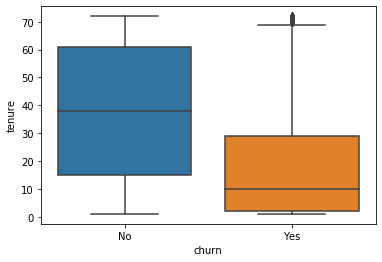

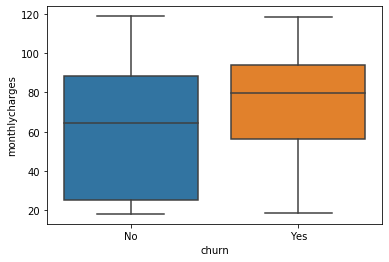

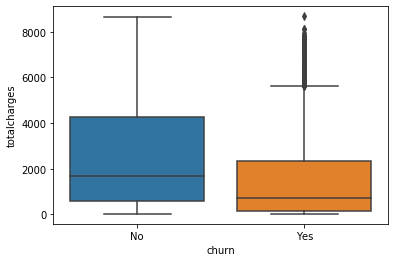

In [354]:
for col in numerical_columns_list:
    sns.boxplot(data=data,y=col, x='churn')
    plt.show()

In [355]:
#list(data._get_numeric_data().columns)
#list[data.drop('monthlycharges',axis=1).columns]
#What is wrong here???????????????????????????????????????????????????????????????????????????????????????????????????????????????????
#categorical_feat = list(filter(lambda col:col not in list(data._get_numeric_data().columns)+['customerid','churn'], data.columns))

In [356]:
categorical_feat = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity'
                     , 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                     'paperlessbilling', 'paymentmethod']

In [357]:
data._get_numeric_data()

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [358]:
pd.get_dummies(data[categorical_feat],drop_first=True)

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [359]:
df = pd.concat([pd.get_dummies(data[categorical_feat],drop_first=True),data._get_numeric_data(),data['churn']],axis=1)
    

In [360]:
df['churn'].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

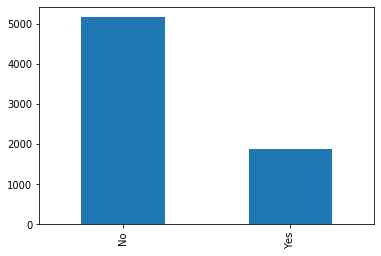

In [361]:
df['churn'].value_counts().plot.bar()

In [362]:
df.head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,seniorcitizen,tenure,monthlycharges,totalcharges,churn
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,29.85,29.85,No
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,34,56.95,1889.50,No
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,2,53.85,108.15,Yes
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,45,42.30,1840.75,No
4,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,2,70.70,151.65,Yes


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
gender_Male                              7032 non-null uint8
partner_Yes                              7032 non-null uint8
dependents_Yes                           7032 non-null uint8
phoneservice_Yes                         7032 non-null uint8
multiplelines_No phone service           7032 non-null uint8
multiplelines_Yes                        7032 non-null uint8
internetservice_Fiber optic              7032 non-null uint8
internetservice_No                       7032 non-null uint8
onlinesecurity_No internet service       7032 non-null uint8
onlinesecurity_Yes                       7032 non-null uint8
onlinebackup_No internet service         7032 non-null uint8
onlinebackup_Yes                         7032 non-null uint8
deviceprotection_No internet service     7032 non-null uint8
deviceprotection_Yes                     7032 non-null uint8
techsupport_No internet service        

In [364]:
df['churn'] = df['churn'].map({'No':0, 'Yes':1})

In [365]:
#Split the data into target variable (y) and prditive variables (X)
X = df.drop('churn',axis=1)
y= df['churn']

In [366]:
# Using train_test_split, 67% od data was assigned to training set and 33% of data was assigned 
#to test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

Balancing training dataset through oversampling method and then applying SelectKBest method to select 10 best features.

In [367]:
train = pd.concat((X_train,y_train),axis=1)

In [368]:
non_churned_customers = train[train['churn']==0] 
churned_customers = train[train['churn']==1]

In [369]:
print('length of train dataset is {}'.format(len(train)))
print('length of non_churned_customers dataset is {}'.format(len(non_churned_customers)))
print('length of churned_customers dataset is {}'.format(len(churned_customers)))
print('ratio of non_churned to churned_customers in train dataset is {}'
      .format(len(non_churned_customers)/len(churned_customers)))

length of train dataset is 4711
length of non_churned_customers dataset is 3452
length of churned_customers dataset is 1259
ratio of non_churned to churned_customers in train dataset is 2.7418586179507547


In [370]:
#To handle imbalanced dataset, SMOTE technique is used.
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train,y_train)

In [371]:
train_smote = pd.concat((X_train,y_train),axis=1)

In [372]:
non_churned_customers = train_smote[train_smote['churn']==0] 
churned_customers = train_smote[train_smote['churn']==1]

In [373]:
print('length of train dataset is {}'.format(len(X_train)))
print('length of non_churned_customers dataset is {}'.format(len(non_churned_customers)))
print('length of churned_customers dataset is {}'.format(len(churned_customers)))
print('ratio of non_churned to churned_customers in train dataset is {}'
      .format(len(non_churned_customers)/len(churned_customers)))

length of train dataset is 6904
length of non_churned_customers dataset is 3452
length of churned_customers dataset is 3452
ratio of non_churned to churned_customers in train dataset is 1.0


In [268]:
len(y_train)

6904

# Feature Selection by SelectKBest

In [103]:
#To remove irrelevant or noisy features from the dataser, the selectKBest was used.
#removing irrelevant features, speed up the training of model and enhance the accuracy score
#This function select a number of features with highest correlation to the target.
selector = SelectKBest(chi2,k=10)

In [104]:
X_train_select = selector.fit_transform(X_train,y_train)

In [105]:
cols = selector.get_support(indices=True)

In [106]:
X_test_select = X_test.iloc[:,cols]

In [408]:
# selected important features are listed:
train.iloc[:,cols].columns

Index(['dependents_Yes', 'onlinesecurity_Yes',
       'deviceprotection_No internet service',
       'techsupport_No internet service', 'streamingtv_No internet service',
       'streamingmovies_No internet service', 'contract_Two year', 'tenure',
       'monthlycharges', 'totalcharges'],
      dtype='object')

# Decision Tree Classifier

In [107]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.
tree = DecisionTreeClassifier()
param_grid = {'criterion':['entropy','gini'],'max_features':range(1,11),
              'max_depth':range(1,11)}
grid_tree = GridSearchCV(tree,param_grid,cv=10,scoring='accuracy',
                         n_jobs=-1)
grid_tree.fit(X_train_select,y_train)
pred_grid_tree = grid_tree.predict(X_test_select)
y_pred_grid_tree_prob_ = grid_tree.predict_proba(X_test_select)[:, 1]

In [108]:
print('The best estimator is {}'.format(grid_tree.best_estimator_))
print('The best score is {}'.format(grid_tree.best_score_))
print('The best parameters are {}'.format(grid_tree.best_params_))

The best estimator is DecisionTreeClassifier(max_depth=8, max_features=6)
The best score is 0.8027475408460749
The best parameters are {'criterion': 'gini', 'max_depth': 8, 'max_features': 6}


In [109]:

print('the Cross validation accuracy score for Decision tree model is {}'
      .format(np.mean(cross_val_score(grid_tree,X_test_select,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for SVC model is:')
print(confusion_matrix(y_test,pred_grid_tree))
print('Here is the classification report for logistic regression model:')
print()
print(classification_report(y_test,pred_grid_tree))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_tree_prob_)))

#Because the dataset is imbalanced, it is important to look at recall and precision instead of accuracy
#Tuned decision tree model resulted in high recall of 0.70, but a Low precision (0.49) indicates many false positive (455)
#Confusion matrix also give us false negative, false positive, true positive, and true negative.

the Cross validation accuracy score for Decision tree model is 0.7751072961373391
The confusion matrix for SVC model is:
[[1266  445]
 [ 182  428]]
Here is the classification report for logistic regression model:

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1711
           1       0.49      0.70      0.58       610

    accuracy                           0.73      2321
   macro avg       0.68      0.72      0.69      2321
weighted avg       0.77      0.73      0.74      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5531101844279286


# Random Forest Classifier

In [111]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

rfc = RandomForestClassifier(n_jobs=-1)
param_grid={'n_estimators':range(1,201,10), 'max_depth':range(1,11),
           'criterion':['gini','entropy']}
grid_rfc = GridSearchCV(rfc,param_grid,scoring = 'accuracy',cv=10, n_jobs=-1)
grid_rfc.fit(X_train_select,y_train)
pred_grid_rfc = grid_rfc.predict(X_test_select)
y_pred_grid_rfc_prob_ = grid_rfc.predict_proba(X_test_select)[:, 1]

In [112]:
print('The best estimator is {}'.format(grid_rfc.best_estimator_))
print('The best score is {}'.format(grid_rfc.best_score_))
print('The best parameters are {}'.format(grid_rfc.best_params_))

The best estimator is RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=141,
                       n_jobs=-1)
The best score is 0.8108607563078085
The best parameters are {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 141}


In [113]:
print('the cv accuracy score is {}'.format(np.mean(cross_val_score(grid_rfc,X_test_select,y_test,cv=10,n_jobs=-1))))
print('here is the confusion matrix:')
print(confusion_matrix(y_test,pred_grid_rfc))
print('Here is the classification report:')
print(classification_report(y_test,pred_grid_rfc))
# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_rfc_prob_)))

#Because of the many false positives (412), the precision is low (0.5) compare to recall score (0.67).

the cv accuracy score is 0.7906134379162351
here is the confusion matrix:
[[1299  412]
 [ 200  410]]
Here is the classification report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1711
           1       0.50      0.67      0.57       610

    accuracy                           0.74      2321
   macro avg       0.68      0.72      0.69      2321
weighted avg       0.77      0.74      0.75      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.610492083461311


# Logistic Regression Classifier

In [114]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

lr = LogisticRegression(n_jobs=-1, solver='lbfgs')
param_grid = {'penalty':['none','l2'], 'C' : np.arange(0.1,3,0.1),'class_weight':['balanced',None]}
grid_lr = GridSearchCV(lr,param_grid,scoring = 'accuracy',cv=10, n_jobs=-1)
grid_lr.fit(X_train_select,y_train)
pred_grid_lr = grid_lr.predict(X_test_select)
y_pred_grid_lr_prob_ = grid_lr.predict_proba(X_test_select)[:, 1]

In [115]:
print('The best estimator is {}'.format( grid_lr.best_estimator_))
print('The best score is {}'.format(grid_lr.best_score_))
print('The best parameters are {}'.format(grid_lr.best_params_))

The best estimator is LogisticRegression(C=1.1, n_jobs=-1)
The best score is 0.7943465676713019
The best parameters are {'C': 1.1, 'class_weight': None, 'penalty': 'l2'}


In [116]:
print('the Cross validation accuracy score for Logistic Regression model is {}'
      .format(np.mean(cross_val_score(grid_lr,X_test_select,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for SVC model is:')
print(confusion_matrix(y_test,pred_grid_lr))
print('Here is the classification report for logistic regression model:')
print()
print(classification_report(y_test,pred_grid_lr))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_lr_prob_)))

# While recall slightly improved compare to random forest model, but the precision is similar (0.50) because of 
# the many false positives

the Cross validation accuracy score for Logistic Regression model is 0.7867359775048098
The confusion matrix for SVC model is:
[[1284  427]
 [ 175  435]]
Here is the classification report for logistic regression model:

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1711
           1       0.50      0.71      0.59       610

    accuracy                           0.74      2321
   macro avg       0.69      0.73      0.70      2321
weighted avg       0.78      0.74      0.75      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5897780522264587


# Support Vector Machine (SVM) Classifier

In [117]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

svc = SVC(probability=True)
param_dist = {'kernel': ['rbf'], 'gamma': [1, 1e-1,1e-2,1e-3, 1e-4], 'C': [1, 10, 100, 1000]}
#param_dist = [{'kernel': ['rbf'], 'gamma': [1, 1e-1,1e-2,1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, 
#              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
rand_svc = RandomizedSearchCV(svc,param_dist,cv=10,scoring='accuracy',n_iter=20,n_jobs=-1)
rand_svc.fit(X_train_select,y_train)
pred_rand_svc = rand_svc.predict(X_test_select)
y_pred_rand_svc_prob_ = rand_svc.predict_proba(X_test_select)[:, 1]

In [118]:
print('The best estimator is {}'.format( rand_svc.best_estimator_))
print('The best score is {}'.format(rand_svc.best_score_))
print('The best parameters are {}'.format(rand_svc.best_params_))

The best estimator is SVC(C=10, gamma=0.1, probability=True)
The best score is 0.8062136370309778
The best parameters are {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [119]:
print('the Cross validation accuracy score for SVC model is {}'
      .format(np.mean(cross_val_score(rand_svc,X_test_select,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for SVC model is:')
print(confusion_matrix(y_test,pred_rand_svc))
print('Here is the classification report for knn model:')
print(classification_report(y_test,pred_rand_svc))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_rand_svc_prob_)))

#SVC model has similar precision score but has lower recall score because of the many false negatives.

the Cross validation accuracy score for SVC model is 0.7733646588722807
The confusion matrix for SVC model is:
[[1477  234]
 [ 362  248]]
Here is the classification report for knn model:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1711
           1       0.51      0.41      0.45       610

    accuracy                           0.74      2321
   macro avg       0.66      0.63      0.64      2321
weighted avg       0.73      0.74      0.73      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.45531047032670624


# KNN

In [120]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
grid_knn = GridSearchCV(knn,param_grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_knn.fit(X_train_select,y_train)
pred_grid_knn = grid_knn.predict(X_test_select)
y_pred_grid_knn_prob_ = grid_knn.predict_proba(X_test_select)[:, 1]

In [121]:
print('The best estimator is {}'.format( grid_knn.best_estimator_))
print('The best score is {}'.format(grid_knn.best_score_))
print('The best parameters are {}'.format(grid_knn.best_params_))

The best estimator is KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=11,
                     weights='distance')
The best score is 0.7979588498080916
The best parameters are {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [122]:
print('the Cross validation accuracy score for knn model is {}'
      .format(np.mean(cross_val_score(grid_knn,X_test_select,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for knn model is:')
print(confusion_matrix(y_test,pred_grid_knn))
print('Here is the classification report for knn model')
print()
print(classification_report(y_test,pred_grid_knn))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_knn_prob_)))

#While knn model has the advantage of fast training, but the precision and recall is not as good as random forest 
#and logistic regression

the Cross validation accuracy score for knn model is 0.7681996448127867
The confusion matrix for knn model is:
580.25
Here is the classification report for knn model

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1711
           1       0.47      0.66      0.54       610

    accuracy                           0.71      2321
   macro avg       0.66      0.69      0.67      2321
weighted avg       0.75      0.71      0.72      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5226828186159206


# Gradient Boosting Classifier

In [123]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

gb = GradientBoostingClassifier()
param_distributions = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":np.arange(10,1000,50)
    }

rand_gb = RandomizedSearchCV(gb, param_distributions, cv=10, n_jobs=-1)
rand_gb.fit(X_train_select,y_train)
pred_rand_gb = rand_gb.predict(X_test_select)
y_pred_rand_gb_prob_ = rand_gb.predict_proba(X_test_select)[:, 1]

In [124]:
print('The best estimator is {}'.format( rand_gb.best_estimator_))
print('The best score is {}'.format(rand_gb.best_score_))
print('The best parameters are {}'.format(rand_gb.best_params_))

The best estimator is GradientBoostingClassifier(learning_rate=0.075, max_depth=5, n_estimators=710)
The best score is 0.8183951005683845
The best parameters are {'subsample': 1.0, 'n_estimators': 710, 'max_depth': 5, 'loss': 'deviance', 'learning_rate': 0.075}


In [125]:
print('the Cross validation accuracy score for gradient boostig model is {}'
      .format(np.mean(cross_val_score(rand_gb,X_test_select,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for gradient boosting model is:')
print(confusion_matrix(y_test,pred_grid_rfc))
print('Here is the classification report for gradient boosting model')
print()
print(classification_report(y_test,pred_rand_gb))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_rand_gb_prob_)))

# the precision and recall scores are similar to logistic regression, but average precision score is lower (0.58).

the Cross validation accuracy score for gradient boostig model is 0.7802704602634305
The confusion matrix for gradient boosting model is:
[[1299  412]
 [ 200  410]]
Here is the classification report for gradient boosting model

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1711
           1       0.52      0.65      0.57       610

    accuracy                           0.75      2321
   macro avg       0.69      0.72      0.70      2321
weighted avg       0.77      0.75      0.76      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5814813331041567


# Feature Reduction Using PCA

In [374]:
#PCA was used to reduce the number of features through projecting the data into a lower dimentional space.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

# Decision Tree Classifier

In [375]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

tree = DecisionTreeClassifier()
param_grid = {'criterion':['entropy','gini'],'max_features':range(1,11),
              'max_depth':range(1,11)}
grid_tree = GridSearchCV(tree,param_grid,cv=10,scoring='accuracy',
                         n_jobs=-1)
grid_tree.fit(X_train,y_train)
pred_grid_tree = grid_tree.predict(X_test)
y_pred_grid_tree_prob_ = grid_tree.predict_proba(X_test)[:, 1]

In [376]:
print('The best estimator is {}'.format(grid_tree.best_estimator_))
print('The best score is {}'.format(grid_tree.best_score_))
print('The best parameters are {}'.format(grid_tree.best_params_))

The best estimator is DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5)
The best score is 0.8042054153820339
The best parameters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 5}


In [377]:
print('the Cross validation accuracy score for Decision tree model is {}'
      .format(np.mean(cross_val_score(grid_tree,X_test,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for Decision tree model is:')
print(confusion_matrix(y_test,pred_grid_tree))
print('Here is the classification report for decidion tree model:')
print()
print(classification_report(y_test,pred_grid_tree))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_tree_prob_)))

the Cross validation accuracy score for Decision tree model is 0.7725081397069705
The confusion matrix for Decision tree model is:
[[1366  345]
 [ 238  372]]
Here is the classification report for decidion tree model:

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1711
           1       0.52      0.61      0.56       610

    accuracy                           0.75      2321
   macro avg       0.69      0.70      0.69      2321
weighted avg       0.76      0.75      0.75      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.49779918316996885


# Random Forest Classifier

In [379]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

rfc = RandomForestClassifier(n_jobs=-1)
param_grid={'n_estimators':range(1,201,10), 'max_depth':range(1,11),
           'criterion':['gini','entropy']}
grid_rfc = GridSearchCV(rfc,param_grid,scoring = 'accuracy',cv=10, n_jobs=-1)
grid_rfc.fit(X_train,y_train)
pred_grid_rfc = grid_rfc.predict(X_test)
y_pred_grid_rfc_prob_ = grid_rfc.predict_proba(X_test)[:, 1]

In [380]:
print('The best estimator is {}'.format(grid_rfc.best_estimator_))
print('The best score is {}'.format(grid_rfc.best_score_))
print('The best parameters are {}'.format(grid_rfc.best_params_))

The best estimator is RandomForestClassifier(max_depth=10, n_estimators=151, n_jobs=-1)
The best score is 0.8295610226724554
The best parameters are {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 151}


In [381]:
print('the cv accuracy score is {}'.format(np.mean(cross_val_score(grid_rfc,X_test,y_test,cv=10))))
print('here is the confusion matrix:')
print(confusion_matrix(y_test,pred_grid_rfc))
print('Here is the classification report:')
print()
print(classification_report(y_test,pred_grid_rfc))
# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_grid_rfc_prob_)))

the cv accuracy score is 0.7837150362586948
here is the confusion matrix:
[[1366  345]
 [ 220  390]]
Here is the classification report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1711
           1       0.53      0.64      0.58       610

    accuracy                           0.76      2321
   macro avg       0.70      0.72      0.70      2321
weighted avg       0.77      0.76      0.76      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5552183840521199


# Logistic Regression Classifier

In [382]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

lr = LogisticRegression(n_jobs=-1, solver='lbfgs')
param_grid = {'penalty':['none','l2'], 'C' : np.arange(0.1,3,0.1),'class_weight':['balanced',None]}
grid_lr = GridSearchCV(lr,param_grid,scoring = 'accuracy',cv=10, n_jobs=-1)
grid_lr.fit(X_train,y_train)
pred_grid_lr = grid_lr.predict(X_test)
y_pred_grid_lr_prob_ = grid_lr.predict_proba(X_test)[:, 1]

In [383]:
print('The best estimator is {}'.format( grid_lr.best_estimator_))
print('The best score is {}'.format(grid_lr.best_score_))
print('The best parameters are {}'.format(grid_lr.best_params_))

The best estimator is LogisticRegression(C=0.2, class_weight='balanced', n_jobs=-1)
The best score is 0.8014513727217434
The best parameters are {'C': 0.2, 'class_weight': 'balanced', 'penalty': 'l2'}


In [393]:
print('the Cross validation accuracy score for Logistic Regression model is {}'
      .format(np.mean(cross_val_score(grid_lr,X_test,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for SVC model is:')
print(confusion_matrix(y_test,pred_grid_lr))
print('Here is the classification report for logistic regression model:')
print()      
print(classification_report(y_test,pred_grid_lr))
# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is: {}'.format(average_precision_score(y_test, y_pred_grid_lr_prob_)))


the Cross validation accuracy score for Logistic Regression model is 0.7910315228651769
The confusion matrix for SVC model is:
[[1329  382]
 [ 190  420]]
Here is the classification report for logistic regression model:

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1711
           1       0.52      0.69      0.59       610

    accuracy                           0.75      2321
   macro avg       0.70      0.73      0.71      2321
weighted avg       0.78      0.75      0.76      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is: 0.6024086246109441


# Support Vector Machine (SVM) Classifier

In [396]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

svc = SVC()
param_dist = {'kernel': ['rbf'], 'gamma': [1, 1e-1,1e-2,1e-3, 1e-4], 'C': [1, 10, 100, 1000], 'probability' : [True]}
#param_dist = [{'kernel': ['rbf'], 'gamma': [1, 1e-1,1e-2,1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, 
#              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
rand_svc = RandomizedSearchCV(svc,param_dist,cv=10,scoring='accuracy',n_iter=20,n_jobs=-1)
rand_svc.fit(X_train,y_train)
pred_rand_svc = rand_svc.predict(X_test)
y_pred_rand_svc_prob_ = rand_svc.predict_proba(X_test)[:, 1]

In [397]:
print('The best estimator is {}'.format( rand_svc.best_estimator_))
print('The best score is {}'.format(rand_svc.best_score_))
print('The best parameters are {}'.format(rand_svc.best_params_))

The best estimator is SVC(C=1000, gamma=0.01, probability=True)
The best score is 0.8139155603095704
The best parameters are {'probability': True, 'kernel': 'rbf', 'gamma': 0.01, 'C': 1000}


In [398]:
print('the Cross validation accuracy score for SVC model is {}'
      .format(np.mean(cross_val_score(rand_svc,X_test,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for SVC model is:')
print(confusion_matrix(y_test,pred_rand_svc))
print('Here is the classification report for knn model:')
print()
print(classification_report(y_test,pred_rand_svc))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_rand_svc_prob_)))

the Cross validation accuracy score for SVC model is 0.7936177297617286
The confusion matrix for SVC model is:
[[1296  415]
 [ 189  421]]
Here is the classification report for knn model:

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1711
           1       0.50      0.69      0.58       610

    accuracy                           0.74      2321
   macro avg       0.69      0.72      0.70      2321
weighted avg       0.78      0.74      0.75      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5327604161538978


# K Nearest Neighbors (knn)

In [399]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}
grid_knn = GridSearchCV(knn,param_grid,n_jobs=-1,cv=10,scoring='accuracy')
grid_knn.fit(X_train,y_train)
pred_grid_knn = grid_knn.predict(X_test)
y_pred_grid_knn_prob_ = grid_knn.predict_proba(X_test)[:, 1]

In [400]:
print('The best estimator is {}'.format( grid_knn.best_estimator_))
print('The best score is {}'.format(grid_knn.best_score_))
print('The best parameters are {}'.format(grid_knn.best_params_))

The best estimator is KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=19,
                     weights='distance')
The best score is 0.8149313114788482
The best parameters are {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [401]:
print('the Cross validation accuracy score for knn model is {}'
      .format(np.mean(cross_val_score(grid_knn,X_test,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for knn model is:')
print(confusion_matrix(y_test,pred_grid_knn))
print('Here is the classification report for knn model:')
print(classification_report(y_test,pred_grid_knn))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_rand_gb_prob_)))


the Cross validation accuracy score for knn model is 0.7664810566819595
The confusion matrix for knn model is:
[[1294  417]
 [ 208  402]]
Here is the classification report for knn model:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1711
           1       0.49      0.66      0.56       610

    accuracy                           0.73      2321
   macro avg       0.68      0.71      0.68      2321
weighted avg       0.76      0.73      0.74      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5814813331041567


# Gradient Boosting Classifier

In [402]:
# model tuned using grid search and the model with optimized hyperparameters is used for predictio and 
# evaluating the model performance.

gb = GradientBoostingClassifier()
param_distributions = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":np.arange(10,1000,50)
    }

rand_gb = RandomizedSearchCV(gb, param_distributions, cv=10, n_jobs=-1)
rand_gb.fit(X_train,y_train)
pred_rand_gb = rand_gb.predict(X_test)
y_pred_rand_gb_prob_ = rand_gb.predict_proba(X_test)[:, 1]

In [403]:
print('The best estimator is {}'.format( rand_gb.best_estimator_))
print('The best score is {}'.format(rand_gb.best_score_))
print('The best parameters are {}'.format(rand_gb.best_params_))

The best estimator is GradientBoostingClassifier(learning_rate=0.025, max_depth=8, n_estimators=460,
                           subsample=0.8)
The best score is 0.8230491411313157
The best parameters are {'subsample': 0.8, 'n_estimators': 460, 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.025}


In [410]:
print('the Cross validation accuracy score for gradient boostig model is {}'
      .format(np.mean(cross_val_score(rand_gb,X_test,y_test,
                                      cv=10,n_jobs=-1))))
print('The confusion matrix for gradient boosting model is:')
print(confusion_matrix(y_test,pred_grid_rfc))
print('Here is the classification report for gradient boosting model:')
print(classification_report(y_test,pred_rand_gb))

# calculate AUC
print('The  Area Under the Precision-Recall Curve (AUPRC) score is:{}'.format(
    average_precision_score(y_test, y_pred_rand_gb_prob_)))


the Cross validation accuracy score for gradient boostig model is 0.7910370726653839
The confusion matrix for gradient boosting model is:
[[1366  345]
 [ 220  390]]
Here is the classification report for gradient boosting model:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1711
           1       0.52      0.60      0.56       610

    accuracy                           0.75      2321
   macro avg       0.69      0.70      0.69      2321
weighted avg       0.76      0.75      0.76      2321

The  Area Under the Precision-Recall Curve (AUPRC) score is:0.5510275329447458


## Conclusion

Because the classes are unbalanced, an appropriate measure was considered for the data preparation. The oversampling method is used to handle the unbalanced dataset. For reducing the number of features, PCA and SelectKBest methods are used and results are compared. Choosing the best predictors for target variable using SelectKBest, reduce the overfitting and training time while improves the accuracy by removing irrelevant/noise data. The different models including logistic regression, k nearest neghibor, support vector machine, gradient boosting, decision tree, and random forest are used. 

Because the dataset is imbalanced, the accuracy is not a good indicator for finding best model. Here, we also looked at precision, recall scores, and average precision score. The results showed that SelectKBest and PCA performance is very close to each other. However, the best score (accuracy = 0.79, precision = 0.52, recall = 0.69, and F1 score = 0.59, average precision score = 0.60) obtained where PCA method is used for selecting best features and logistic regression model was used for classification. 

 
